In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_context("notebook", rc={"lines.linewidth": 3})
##################################################
plt.style.use('tableau-colorblind10')
##################################################

In [2]:
cate = "primaryNivo"
ano = ".positive."

In [3]:
df_cate = pd.read_csv(f"{cate}{ano}connectivity.txt",index_col=0)

In [4]:
df_cl = pd.read_csv("../leave_one_out/braun_data_clinical_data.csv")
df_merge = pd.merge(df_cate.T.reset_index(),df_cl,how='left', left_on="index", right_on="RNA_ID" )

In [5]:
import numpy as np
def replace_outlier(pd_series):
    l = pd_series.to_numpy()
    low = pd_series.quantile(0.02)
    up = pd_series.quantile(0.98)
    l = [e if (low < e) else low for e in l]
    l = [e if (up > e) else up for e in l]
    return l

In [6]:
def next_replace_out(pdf):
    gene_tar = pdf.columns.to_list()[1:-13]
    for i in gene_tar:
        pdf[i] = replace_outlier(pdf[i])
    return pdf

pdf = next_replace_out(df_merge.copy())

In [7]:
pdf.columns = ["samples"] + pdf.columns.tolist()[1:]
#pdf

In [8]:
pdf.fillna(0,inplace=True)
gene_var = pdf[pdf.columns.to_list()[1:-13]].var().sort_values(ascending=False)[:5000].index.tolist()

In [9]:
len(gene_var)

5000

from lifelines import CoxPHFitter
df_cox = pd.DataFrame()

for i in gene_var:
    try:
        df_pe1 = pdf[[i,'OS', 'OS_CNSR']].copy()
        df_pe1[i] = df_pe1[i] /1000
        cph = CoxPHFitter()
        cph.fit(df_pe1, duration_col='OS', event_col='OS_CNSR')
        df_cox = pd.concat([df_cox,cph.summary])
        #print(cph.summary)
    except:
        pass
    #break

"""        
import scipy

plist = []
for i in gene_var:
    cb = pdf[pdf["Benefit"]=="CB"][i].tolist()
    ncb = pdf[pdf["Benefit"]=="NCB"][i].tolist()
    
    t_Pvalue = scipy.stats.ttest_ind(cb,ncb,\
                            equal_var=[scipy.stats.levene(cb,ncb)[1] > 0.05])[1]
    plist.append(t_Pvalue)
    
df_cox["ttest"] = plist
"""
df_cox.to_csv(f"{cate}{ano}_os_significant_nodes_by_connectivity.txt")


from lifelines import CoxPHFitter
df_cox = pd.DataFrame()

for i in gene_var:

    try:
        df_pe1 = pdf[[i,'PFS', 'PFS_CNSR']].copy()
        df_pe1[i] = df_pe1[i]/1000
        cph = CoxPHFitter()
        cph.fit(df_pe1, duration_col='PFS', event_col='PFS_CNSR')
        df_cox = pd.concat([df_cox,cph.summary])
        #print(df_cox)
    except:
        pass
    #break
"""
import scipy
plist = []
for i in gene_var:
    cb = pdf[pdf["Benefit"]=="CB"][i].tolist()
    ncb = pdf[pdf["Benefit"]=="NCB"][i].tolist()
    
    t_Pvalue = scipy.stats.ttest_ind(cb,ncb,\
                            equal_var=[scipy.stats.levene(cb,ncb)[1] > 0.05])[1]
    plist.append(t_Pvalue)
df_cox["ttest"] = plist
"""
df_cox.to_csv(f"{cate}{ano}_pfs_significant_nodes_by_connectivity.txt")


#scipy.stats.wilcoxon
import scipy
resos = pd.read_csv(f"{cate}_os_significant_nodes_by_connectivity.txt")
respfs = pd.read_csv(f"{cate}_pfs_significant_nodes_by_connectivity.txt")

osplist = []
for i in resos["covariate"].tolist():
    cb = pdf[pdf["Benefit"]=="CB"][i].tolist()
    ncb = pdf[pdf["Benefit"]=="NCB"][i].tolist()
    
    w_Pvalue = scipy.stats.wilcoxon(cb,ncb)
    osplist.append(w_Pvalue)
w_Pvalue

In [10]:
pdf.set_index("samples",inplace=True)

#read cox regression result file

In [11]:
resos = pd.read_csv(f"{cate}{ano}_os_significant_nodes_by_connectivity.txt")
respfs = pd.read_csv(f"{cate}{ano}_pfs_significant_nodes_by_connectivity.txt")
#significant_gene = set(resos[resos["ttest"]<0.05]["covariate"].tolist()).union(respfs[respfs["ttest"]<0.05]["covariate"].tolist())#


####### 1st choice
#significant_gene = set(resos[resos["ttest"]<0.01]["covariate"].tolist()).intersection(respfs[respfs["ttest"]<0.01]["covariate"].tolist())
significant_gene = set(resos[resos["p"]<0.01]["covariate"].tolist()).intersection(respfs[respfs["p"]<0.01]["covariate"].tolist())
#significant_gene = set(resos[resos["p"]<0.01]["covariate"].tolist()).union(respfs[respfs["p"]<0.01]["covariate"].tolist())
####### 2st choice --os
#significant_gene = resos[resos["ttest"]<0.005]["covariate"].tolist()

####### 3st choice --pfs
#significant_gene = respfs[respfs["p"]<0.001]["covariate"].tolist()


#print(set(resos[resos["ttest"]<0.01]["covariate"].tolist()).intersection(respfs[respfs["ttest"]<0.01]["covariate"].tolist()))

print(len(significant_gene))
#resos[resos["p"]<0.01]["covariate"].tolist()

21


In [12]:
tar = pdf[list(significant_gene)]
tar.columns

Index(['ACAP3', 'PLCB3', 'ACIN1', 'COPG2', 'INF2', 'PUS3', 'TCIRG1', 'LRCH4',
       'SETD1B', 'PPP1R18', 'WFDC10A', 'NLRC5', 'MYO9B', 'MAPK8IP3', 'COX6B1',
       'MIR31HG', 'DDX39B-AS1', 'IGLV11-55', 'MICAL1', 'SLC39A12-AS1',
       'WFDC11'],
      dtype='object')

In [14]:
tar

,ACAP3,PLCB3,ACIN1,COPG2,INF2,PUS3,TCIRG1,LRCH4,SETD1B,PPP1R18,...,NLRC5,MYO9B,MAPK8IP3,COX6B1,MIR31HG,DDX39B-AS1,IGLV11-55,MICAL1,SLC39A12-AS1,WFDC11
samples,,,,,,,,,,,,,,,,,,,,,
EA595500,544.962263,413.352698,354.267842,58.421606,535.041454,287.866849,392.808165,306.216870,378.430499,120.694658,...,225.099572,206.964832,406.265472,364.087870,11.401194,8.499666,2.712576,299.988377,4.830571,5.049438
EA595522,435.251143,321.413630,380.905789,65.515128,444.594049,150.849463,487.248771,431.101175,427.398312,162.745250,...,280.098398,322.156814,473.971846,755.575040,13.064999,8.889098,3.953820,459.233848,5.248723,26.132406
EA595529,413.812749,275.758692,237.454939,143.060131,399.620772,166.500718,362.310026,460.803360,282.020574,146.392025,...,217.869626,294.299114,465.916746,769.978087,9.354005,7.139416,1.865193,256.371655,3.550454,1.351601
EA595624,531.261646,427.278317,493.866170,96.637772,483.222270,123.970420,630.251284,556.382615,547.628888,394.952221,...,379.333840,492.019347,529.763377,422.478113,14.418413,10.448825,4.355069,567.106380,4.821722,2.579082
EA595635,406.933457,268.577009,314.416922,457.888012,482.012457,306.904506,370.024355,345.344146,435.513570,168.586810,...,217.916391,217.285773,477.837972,639.964615,1159.182227,7.572437,376.638368,334.479394,4.403563,239.508015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P66511-01E-Run1_S17_L002,473.428780,403.192438,368.068289,112.779726,516.361080,162.482412,505.787972,422.576868,463.676587,196.924651,...,284.246648,315.172182,471.442285,451.405380,14.390554,11.340570,3.521321,433.387072,5.515513,133.426790
P66511-05E-Run1_S11_L001,476.282409,423.817809,495.361743,88.510866,464.827458,112.258074,623.801282,471.883100,476.561622,336.425765,...,237.128616,420.146998,433.269509,428.876686,1052.435014,840.317491,2.281116,348.173012,507.769259,467.488619
P66511-06G-Run1_S16_L001,428.708011,382.275002,328.275153,78.304160,534.920499,64.010202,425.602183,406.416057,467.808180,180.529532,...,257.020224,272.201733,466.952871,452.116325,14.384863,10.162774,3.499327,410.572145,5.246126,2.164375


In [15]:
#colors =  ['#005baa','#6d6e71','#E7131A']
row_colors =  pdf["Benefit"].copy().replace("ICB","#6d6e71").replace("NCB","#E7131A").replace("CB","#005baa")
row_colors

samples
EA595500                    #E7131A
EA595522                    #6d6e71
EA595529                    #6d6e71
EA595624                    #005baa
EA595635                    #E7131A
                             ...   
P66511-01E-Run1_S17_L002    #6d6e71
P66511-05E-Run1_S11_L001    #E7131A
P66511-06G-Run1_S16_L001    #6d6e71
P66511-07H-Run1_S19_L002    #6d6e71
P66511-09B-Run1_S26_L002    #6d6e71
Name: Benefit, Length: 133, dtype: object

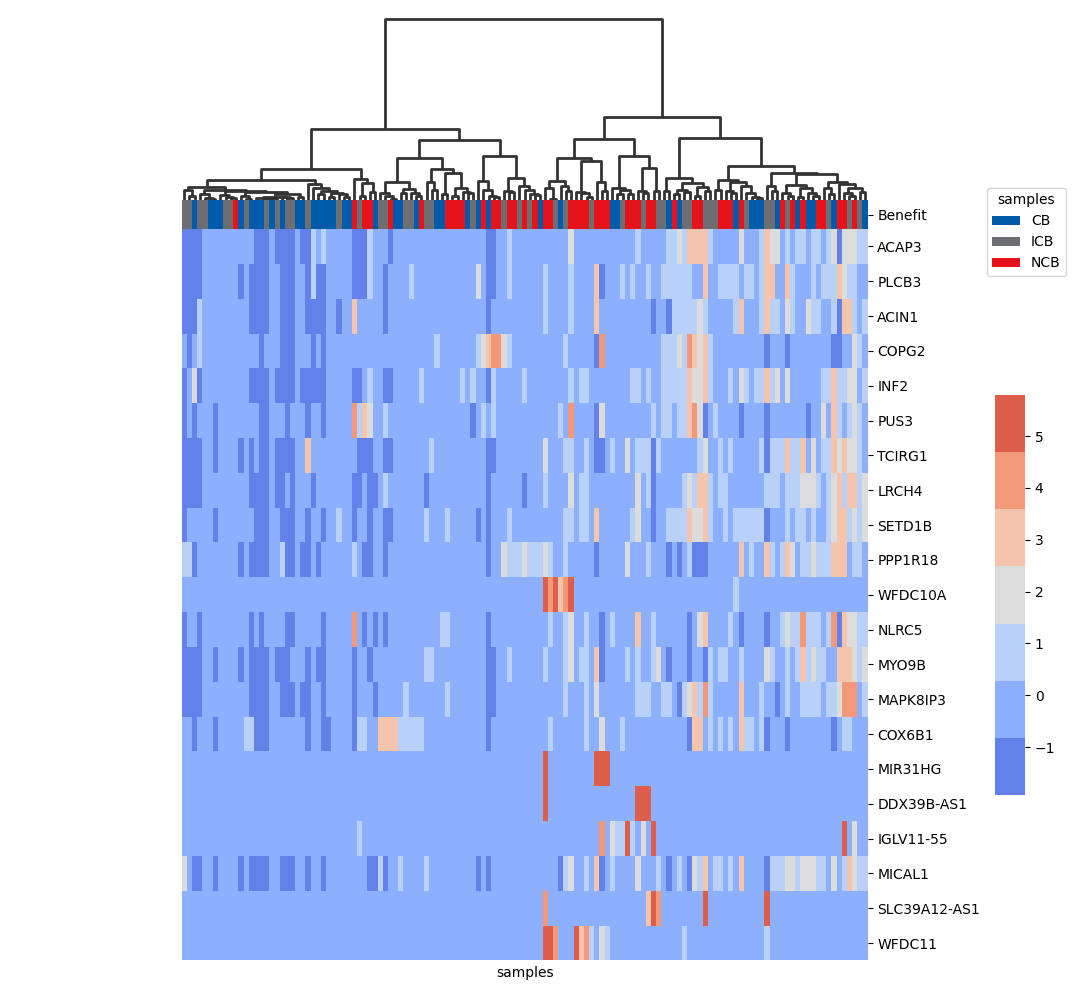

In [28]:
import seaborn as sns
from matplotlib import pyplot as plt
import scienceplots

#plt.figure(figsize=(10, 2))
g1 = sns.clustermap(tar.T, cmap=sns.color_palette("coolwarm", 7),method="ward",metric="cosine",
                    col_cluster=True,row_cluster=False
                    ,col_colors=row_colors,xticklabels=False,z_score=0,yticklabels=True)

plt.setp(g1.ax_heatmap.get_xticklabels(), rotation=90) 
ax = g1.ax_heatmap
ax.set_ylabel("")
g1.ax_cbar.set_position((1, .2, .03, .4))

dic = {"ICB":"#6d6e71","NCB":"#E7131A","CB":"#005baa"}

for label in ["CB","ICB","NCB"]:
    g1.ax_col_dendrogram.bar(0, 0, color=dic[label], label=label, linewidth=0)
l1 = g1.ax_col_dendrogram.legend(title='samples', loc="best", ncol=1, bbox_to_anchor=(1.3, 0.10))
for a in g1.ax_col_dendrogram.collections:
    a.set_linewidth(2)


#plt.tight_layout()
plt.savefig(f"f3.{cate}{ano}_connectivity.tif",dpi=600,bbox_inches='tight')
plt.savefig(f"f3.{cate}{ano}_connectivity.svg",dpi=600,bbox_inches='tight')
plt.show()
plt.close()
#replace("CB","green").replace("ICB","yellow").replace("NCB","pink")

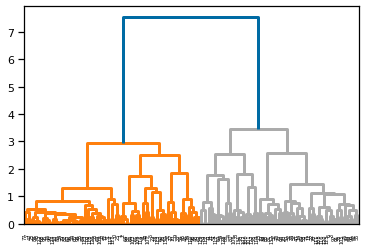

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy import stats

linkage_data = linkage(pdist(stats.zscore(tar), 'cosine'), method='ward', metric='euclidean')
dn = dendrogram(linkage_data)

plt.show() 

In [18]:
def swapPositions(lis):
    newlis = []
    for i in lis:
        if i == 1:
            newlis.append(2)
        if i == 2:
            newlis.append(1)
    return newlis

In [19]:
from scipy.cluster.hierarchy import fcluster

fl = fcluster(linkage_data,2,criterion='maxclust')
print(fl)
#pdf["cres"] = [2 if i != 3 else i for i in fl ]
pdf["cres"] =fl
#pdf["cres"] =swapPositions(fl)
set(pdf["cres"])

[1 1 1 2 2 1 2 1 2 1 1 2 2 2 2 1 1 1 1 2 2 2 2 1 1 1 1 1 2 1 2 1 2 2 1 1 2
 1 1 2 2 1 2 1 1 1 1 1 1 2 2 2 2 1 2 2 1 2 2 2 1 1 1 1 1 1 1 1 1 2 2 2 1 2
 1 2 2 1 2 1 2 2 1 1 1 2 2 1 1 2 1 2 1 2 1 1 1 2 1 2 2 2 2 1 1 2 2 1 2 1 1
 2 2 1 1 1 2 2 1 2 2 1 1 1 1 2 1 2 2 2 1 2 2]


/tmp/ipykernel_1296423/3249993828.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  pdf["cres"] =fl


{1, 2}

In [20]:
pdf[list(significant_gene)+["cres"]].to_csv(f"{cate}{ano}connectivity.bycluster.txt")

In [21]:
a = pdf[list(significant_gene)+["cres"]]
print(a.groupby("cres").mean())

           ACAP3       PLCB3       ACIN1       COPG2        INF2        PUS3  \
cres                                                                           
1     417.855985  337.401142  327.559372  110.266771  453.343253  122.483769   
2     511.827664  424.164647  411.058998  131.537653  543.923678  162.870102   

          TCIRG1       LRCH4      SETD1B     PPP1R18  ...       NLRC5  \
cres                                                  ...               
1     436.722440  366.391563  406.362272  185.427339  ...  257.769463   
2     532.704808  470.426537  501.989447  242.613760  ...  323.801728   

           MYO9B    MAPK8IP3      COX6B1    MIR31HG  DDX39B-AS1  IGLV11-55  \
cres                                                                         
1     268.056476  405.570358  426.169556  12.821095    9.530908   4.366927   
2     374.136494  503.010228  433.840936  84.309283   61.972160  46.138182   

          MICAL1  SLC39A12-AS1     WFDC11  
cres                         

pdf["cres"].to_csv(f"../clustering_comparison/{cate}{ano}.label.txt")

(133, 20559)
133
0.00012422853158377325


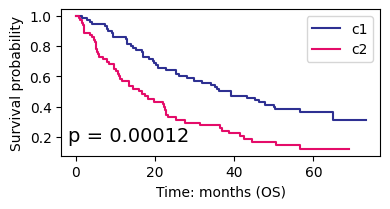

In [26]:
from lifelines import KaplanMeierFitter
from lifelines.datasets import load_waltons
from sksurv.compare import compare_survival
import numpy as np

pdf1 = pdf.copy()
print(pdf1.shape)
y = pdf[["OS_CNSR","OS"]].values
y = np.array([ (i[0],i[1]) for i in y],dtype="bool,f")

#df_os_fl[df_os_fl[tar]>df_os[tar].quantile(0.65)] = "higher"
group_indicator = pdf1["cres"]
print(len(group_indicator))
chi2, pvalue= compare_survival(y,group_indicator)
print(pvalue)

ix = pdf1['cres'] == 1

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2.2))

######################
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('default')
#####################
kmf_control = KaplanMeierFitter()
ax = kmf_control.fit(pdf1.loc[ix]["OS"], pdf1.loc[ix]["OS_CNSR"], label='c1').plot_survival_function(ax=ax,ci_show =False,color='#2e3092')

kmf_exp = KaplanMeierFitter()
ax = kmf_exp.fit(pdf1.loc[~ix]["OS"], pdf1.loc[~ix]["OS_CNSR"], label='c2').plot_survival_function(ax=ax,ci_show =False,color='#e40c69')


#from lifelines.plotting import add_at_risk_counts
#add_at_risk_counts(kmf_exp, kmf_control, ax=ax)

ax.text(0.02, 0.2, "p = "+str(round(pvalue,5)), transform=ax.transAxes, fontsize=14, verticalalignment='top')
#ax.text(0.00, 0.15, "p < 0.00001", transform=ax.transAxes, fontsize=14, verticalalignment='top')

plt.ylabel("Survival probability")
plt.xlabel("Time: months (OS)")
plt.tight_layout()
plt.savefig(f"f3.{cate}{ano}_connectivity_os.tif",dpi=600,bbox_inches='tight')
plt.savefig(f"f3.{cate}{ano}_connectivity_os.svg",dpi=600,bbox_inches='tight')

(133, 20559)
133
0.0003929973283357593


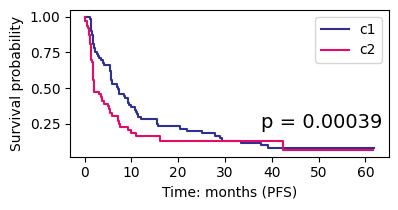

In [27]:

pdf1 = pdf.copy()
print(pdf1.shape)
y = pdf[["PFS_CNSR","PFS"]].values
y = np.array([ (i[0],i[1]) for i in y],dtype="bool,f")

#df_os_fl[df_os_fl[tar]>df_os[tar].quantile(0.65)] = "higher"
group_indicator = pdf1["cres"]
print(len(group_indicator))
chi2, pvalue= compare_survival(y,group_indicator)
print(float(pvalue))


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 2.2))

kmf_control = KaplanMeierFitter()
ax = kmf_control.fit(pdf1.loc[ix]["PFS"], pdf1.loc[ix]["PFS_CNSR"], label='c1').plot_survival_function(ax=ax,ci_show =False,color='#2e3092')


kmf_exp = KaplanMeierFitter()
ax = kmf_exp.fit(pdf1.loc[~ix]["PFS"], pdf1.loc[~ix]["OS_CNSR"], label='c2').plot_survival_function(ax=ax,ci_show =False,color='#e40c69')


#from lifelines.plotting import add_at_risk_counts
#add_at_risk_counts(kmf_exp, kmf_control, ax=ax)

ax.text(0.6, 0.3, "p = "+str(round(pvalue,5)), transform=ax.transAxes, fontsize=14, verticalalignment='top')
#ax.text(0.6, 0.4, "p < 0.00001", transform=ax.transAxes, fontsize=14, verticalalignment='top')

plt.ylabel("Survival probability")
plt.xlabel("Time: months (PFS)")
plt.tight_layout()
plt.savefig(f"f3.{cate}{ano}_connectivity_pfs.tif",dpi=600,bbox_inches='tight')
plt.savefig(f"f3.{cate}{ano}_connectivity_pfs.svg",dpi=600,bbox_inches='tight')

resos = pd.read_csv("pn_os_significant_nodes_by_degree.txt")
respfs = pd.read_csv("pn_pfs_significant_nodes_by_degree.txt")
psignificant_gene = set(resos[resos["ttest"]<0.05]["covariate"].tolist()).intersection(respfs[respfs["ttest"]<0.05]["covariate"].tolist())
print(len(psignificant_gene))

resos = pd.read_csv("pe_os_significant_nodes_by_degree.txt")
respfs = pd.read_csv("pe_pfs_significant_nodes_by_degree.txt")
pesignificant_gene = set(resos[resos["ttest"]<0.05]["covariate"].tolist()).intersection(respfs[respfs["ttest"]<0.05]["covariate"].tolist())
print(len(pesignificant_gene))

resos = pd.read_csv("mn_os_significant_nodes_by_degree.txt")
respfs = pd.read_csv("mn_pfs_significant_nodes_by_degree.txt")
mnsignificant_gene = set(resos[resos["ttest"]<0.05]["covariate"].tolist()).intersection(respfs[respfs["ttest"]<0.05]["covariate"].tolist())
print(len(mnsignificant_gene))


resos = pd.read_csv("me_os_significant_nodes_by_degree.txt")
respfs = pd.read_csv("me_pfs_significant_nodes_by_degree.txt")
mesignificant_gene = set(resos[resos["ttest"]<0.05]["covariate"].tolist()).union(respfs[respfs["ttest"]<0.05]["covariate"].tolist())
print(len(mesignificant_gene))

b = list(psignificant_gene) + list(pesignificant_gene) + list(mnsignificant_gene) + list(mesignificant_gene)
print(len(set(b)))

resos = pd.read_csv(f"{cate}.positive._os_significant_nodes_by_connectivity.txt")
respfs = pd.read_csv(f"{cate}.positive._pfs_significant_nodes_by_connectivity.txt")
s1 = set(resos[resos["p"]<0.01]["covariate"].tolist()).intersection(respfs[respfs["p"]<0.01]["covariate"].tolist())

resos = pd.read_csv(f"{cate}.negative._os_significant_nodes_by_connectivity.txt")
respfs = pd.read_csv(f"{cate}.negative._pfs_significant_nodes_by_connectivity.txt")
s2 = set(resos[resos["p"]<0.01]["covariate"].tolist()).intersection(respfs[respfs["p"]<0.01]["covariate"].tolist())

for i in s1.intersection(s2):
    print(i)